In [1]:
from jitcdde import t
from parameters_h_overall import *
import matplotlib.pyplot as plt
from msrDynamics.objects import Node, System
from msrDynamics.components import mann_HX

Instantiate System Object & Nodes

In [2]:
# ARE system        
ARE = System()

# CORE NODES
c_f1 = Node(m = m_f_c/2, scp = scp_f, W = W_f, y0 = T0_c_f1)
c_f2 = Node(m = m_f_c/2, scp = scp_f, W = W_f, y0 = T0_c_f2)
c_t1 = Node(m = m_t, scp = scp_t, y0 = T0_c_t1)
c_c1 = Node(m = m_c_c/2, scp = scp_c, W = W_c, y0 = T0_c_c1)
c_c2 = Node(m = m_c_c/2, scp = scp_c, W = W_c, y0 = T0_c_c2) 
c_m1 = Node(m = m_m_c, scp = scp_m, y0 = T0_c_m+50)
n = Node(y0 = n_frac0)
C1 = Node(y0 = C0[0])
C2 = Node(y0 = C0[1])
C3 = Node(y0 = C0[2])
C4 = Node(y0 = C0[3])
C5 = Node(y0 = C0[4])
C6 = Node(y0 = C0[5])
rho = Node(y0 = 0.0)

# add reactivity input
def rho_insert(t):
    if (t<t_ins):
        return 0.0
    elif (t<(t_ins+insert_duration)):
        return ((t-t_ins))*(inserted/insert_duration) # linear
    elif (t < t_wd):
        return inserted
    elif (t < t_wd+insert_duration):
        return inserted-((t-t_wd))*(inserted/insert_duration) # linear
    else:
        return 0.0

rho_ext = ARE.add_input(rho_insert, T)

ARE.add_nodes([c_f1,c_f2,c_t1,c_c1,c_c2,c_m1,n,C1,C2,C3,C4,C5,C6,rho])

# FUEL-HELIUM HX1
hx_fh1 = mann_HX(ARE, m_p = m_f_hx, c_p = scp_f, w_p = W_f/2, p1_0 = T0_hfh_f1,
                 p2_0 = T0_hfh_f2, m_s = m_h_hxfh, c_s = scp_h, w_s = W_h_fh, s1_0 = T0_hfh_h1,
                 s2_0 = T0_hfh_h2, m_t = m_t_hxfh, c_t = scp_t, hA_pt = hA_ft_hx, hA_st = hA_ht_hx,n_lumps=2)

hx_fh1_f1,hx_fh1_f2,hx_fh1_t1,hx_fh1_h1,hx_fh1_h2,hx_fh1_f3,hx_fh1_f4,hx_fh1_t2, \
hx_fh1_h3,hx_fh1_h4 = hx_fh1.get_nodes()

# FUEL-HELIUM HX2
hx_fh2 = mann_HX(ARE, m_p = m_f_hx, c_p = scp_f, w_p = W_f/2, p1_0 = T0_hfh_f1,
                 p2_0 = T0_hfh_f2, m_s = m_h_hxfh, c_s = scp_h, w_s = W_h_fh, s1_0 = T0_hfh_h1,
                 s2_0 = T0_hfh_h2, m_t = m_t_hxfh, c_t = scp_t, hA_pt = hA_ft_hx, hA_st = hA_ht_hx,n_lumps=2)

hx_fh2_f1,hx_fh2_f2,hx_fh2_t1,hx_fh2_h1,hx_fh2_h2,hx_fh2_f3,hx_fh2_f4,hx_fh2_t2, \
hx_fh2_h3,hx_fh2_h4 = hx_fh2.get_nodes()

# COOLANT-HELIUM HX1
hx_ch1 = mann_HX(ARE, m_p = m_c_hx, c_p = scp_c, w_p = W_c/2, p1_0 = T0_hch_c1, p2_0 = T0_hch_c2,
                 m_s = m_h_hxch, c_s = scp_h, w_s = W_h_ch, s1_0 = T0_hch_h1, s2_0= T0_hch_h2,
                 m_t = m_t_hxch, c_t = scp_t, hA_pt = hA_ct_hx, hA_st = hA_th_hxch, n_lumps=2)

hx_ch1_c1,hx_ch1_c2,hx_ch1_t1,hx_ch1_h1,hx_ch1_h2,hx_ch1_c3,hx_ch1_c4,hx_ch1_t2, \
hx_ch1_h3,hx_ch1_h4 = hx_ch1.get_nodes()

# COOLANT-HELIUM HX2
hx_ch2 = mann_HX(ARE, m_p = m_c_hx, c_p = scp_c, w_p = W_c/2, p1_0 = T0_hch_c1, p2_0 = T0_hch_c2,
                 m_s = m_h_hxch, c_s = scp_h, w_s = W_h_ch, s1_0 = T0_hch_h1, s2_0= T0_hch_h2,
                 m_t = m_t_hxch, c_t = scp_t, hA_pt = hA_ct_hx, hA_st = hA_th_hxch, n_lumps=2)

hx_ch2_c1,hx_ch2_c2,hx_ch2_t1,hx_ch2_h1,hx_ch2_h2,hx_ch2_c3,hx_ch2_c4,hx_ch2_t2, \
hx_ch2_h3,hx_ch2_h4 = hx_ch2.get_nodes()

# HELIUM-WATER HX1 (FUEL LOOP)
hx_hwf1 = mann_HX(ARE, m_p = m_h_hxhwf, c_p = scp_h, w_p = W_h_fh, p1_0 = T0_hhwf_h1,
                  p2_0 = T0_hhwf_h2, m_s = m_w_hxhwf, c_s = scp_w, w_s = W_hhwf_w,
                  s1_0 = T0_hhwf_w1, s2_0 = T0_hhwf_h2, m_t = m_t_hxhwf,
                  c_t = scp_t, hA_pt = hA_ht_hxhw, hA_st = hA_tw_hxhw, n_lumps = 2)

hx_hwf1_h1, hx_hwf1_h2, hx_hwf1_t1, hx_hwf1_w1, hx_hwf1_w2, hx_hwf1_h3, hx_hwf1_h4, \
hx_hwf1_t2, hx_hwf1_w3, hx_hwf1_w4 = hx_hwf1.get_nodes() 

# HELIUM-WATER HX2 (FUEL LOOP)
hx_hwf2 = mann_HX(ARE, m_p = m_h_hxhwf, c_p = scp_h, w_p = W_h_fh, p1_0 = T0_hhwf_h1,
                  p2_0 = T0_hhwf_h2, m_s = m_w_hxhwf, c_s = scp_w, w_s = W_hhwf_w,
                  s1_0 = T0_hhwf_w1, s2_0 = T0_hhwf_h2, m_t = m_t_hxhwf,
                  c_t = scp_t, hA_pt = hA_ht_hxhw, hA_st = hA_tw_hxhw, n_lumps = 2)

hx_hwf2_h1, hx_hwf2_h2, hx_hwf2_t1, hx_hwf2_w1, hx_hwf2_w2, hx_hwf2_h3, hx_hwf2_h4, \
hx_hwf2_t2, hx_hwf2_w3, hx_hwf2_w4 = hx_hwf2.get_nodes() 

# HELIUM-WATER HX1 (COOLANT LOOP)
hx_hwc1 = mann_HX(ARE, m_p = m_h_hxhwc, c_p = scp_h, w_p = W_h_ch, p1_0 = T0_hhwc_h1,
                  p2_0 = T0_hhwc_h2, m_s = m_w_hxhwc, c_s = scp_w, w_s = W_hhwc_w,
                  s1_0 = T0_hhwc_w1, s2_0 = T0_hhwc_w2, m_t = m_t_hxhwc, c_t = scp_t,
                  hA_pt = hA_ht_hxhwc, hA_st = hA_tw_hxhwc, n_lumps = 2)


hx_hwc1_h1, hx_hwc1_h2, hx_hwc1_t1, hx_hwc1_w1, hx_hwc1_w2, hx_hwc1_h3, hx_hwc1_h4, \
hx_hwc1_t2, hx_hwc1_w3, hx_hwc1_w4 = hx_hwc1.get_nodes() 

# HELIUM-WATER HX2 (COOLANT LOOP)
hx_hwc2 = mann_HX(ARE, m_p = m_h_hxhwc, c_p = scp_h, w_p = W_h_ch, p1_0 = T0_hhwc_h1,
                  p2_0 = T0_hhwc_h2, m_s = m_w_hxhwc, c_s = scp_w, w_s = W_hhwc_w,
                  s1_0 = T0_hhwc_w1, s2_0 = T0_hhwc_w2, m_t = m_t_hxhwc, c_t = scp_t,
                  hA_pt = hA_ht_hxhwc, hA_st = hA_tw_hxhwc, n_lumps = 2)

hx_hwc2_h1, hx_hwc2_h2, hx_hwc2_t1, hx_hwc2_w1, hx_hwc2_w2, hx_hwc2_h3, hx_hwc2_h4, \
hx_hwc2_t2, hx_hwc2_w3, hx_hwc2_w4 = hx_hwc2.get_nodes() 


Define Dynamics

In [3]:
# CORE
c_f1.set_dTdt_advective(source = (hx_fh1_f4.y(t-tau_hx_c_f)+hx_fh2_f2.y(t-tau_hx_c_f))/2) 
c_f1.set_dTdt_internal(source = n.y(), k = k_f1*P)
c_f1.set_dTdt_convective(source = [c_t1.y()], hA = [hA_ft_c/2])

c_f2.set_dTdt_advective(source = c_f1.y()) 
c_f2.set_dTdt_internal(source = n.y(), k = k_f2*P)
c_f2.dTdt_convective = c_f1.dTdt_convective 

c_t1.set_dTdt_convective(source = [c_f1.y(), c_c1.y()], hA = [hA_ft_c,hA_tc_c])

c_c1.set_dTdt_advective(source = (hx_ch1_c2.y(t-tau_c_hx_f)+hx_ch2_c2.y(t-tau_c_hx_f))/2)
c_c1.set_dTdt_convective(source = [c_t1.y(),c_m1.y()], hA = [hA_tc_c/2,hA_mc_c/2])

c_c2.set_dTdt_advective(source = c_c1.y())
c_c2.dTdt_convective = c_c1.dTdt_convective

c_m1.set_dTdt_internal(source = n.y(), k = k_m*P)
c_m1.set_dTdt_convective(source = [c_c1.y()], hA = [hA_mc_c])

n.set_dndt(rho.y()+rho_ext, beta_t, Lam, lam, [C1.y(), C2.y(), C3.y(), C4.y(), C5.y(), C6.y()])
C1.set_dcdt(n.y(), beta[0], Lam, lam[0], tau_c, tau_l)
C2.set_dcdt(n.y(), beta[1], Lam, lam[1], tau_c, tau_l)
C3.set_dcdt(n.y(), beta[2], Lam, lam[2], tau_c, tau_l)
C4.set_dcdt(n.y(), beta[3], Lam, lam[3], tau_c, tau_l)
C5.set_dcdt(n.y(), beta[4], Lam, lam[4], tau_c, tau_l)
C6.set_dcdt(n.y(), beta[5], Lam, lam[5], tau_c, tau_l)
rho.set_drdt([c_f1.dydt(),c_f2.dydt(),c_m1.dydt(),c_c1.dydt(),c_c2.dydt()],[a_f/2,a_f/2,a_b,a_c/2,a_c/2])

# set flow dependencies 
hx_fh1_f1.set_dTdt_advective(source = c_f2.y(t-tau_c_hx_f))
hx_fh1_h1.set_dTdt_advective(source = hx_hwf2_h4.y(t-tau_h))

hx_fh2_f1.set_dTdt_advective(source = c_f2.y(t-tau_c_hx_f))
hx_fh2_h1.set_dTdt_advective(source = hx_hwf1_h4.y())

hx_ch1_c1.set_dTdt_advective(source = c_c2.y(t-tau_c_hx_f))
hx_ch1_h1.set_dTdt_advective(source = hx_hwc1_h4.y(t-tau_h))

hx_ch2_c1.set_dTdt_advective(source = c_c2.y(t-tau_c_hx_f))
hx_ch2_h1.set_dTdt_advective(source = hx_hwc2_h4.y(t-tau_h))

hx_hwf1_h1.set_dTdt_advective(source = hx_fh1_h4.y())
hx_hwf1_w1.set_dTdt_advective(source = T0_hhwf_w1)

hx_hwf2_h1.set_dTdt_advective(source = hx_fh2_h4.y())
hx_hwf2_w1.set_dTdt_advective(source = T0_hhwf_w1)

hx_hwc1_h1.set_dTdt_advective(source = hx_ch1_h4.y())
hx_hwc1_w1.set_dTdt_advective(source = T0_hhwc_w1)

hx_hwc2_h1.set_dTdt_advective(source = hx_ch2_h4.y())
hx_hwc2_w1.set_dTdt_advective(source = T0_hhwc_w1)


In [4]:
# solve system 
sol_jit = ARE.solve(T)

Generating, compiling, and loading C code.
Using default integration parameters.


/home/luke/git/envs/thesis_env/lib/python3.11/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.")
/home/luke/git/envs/thesis_env/lib/python3.11/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did no

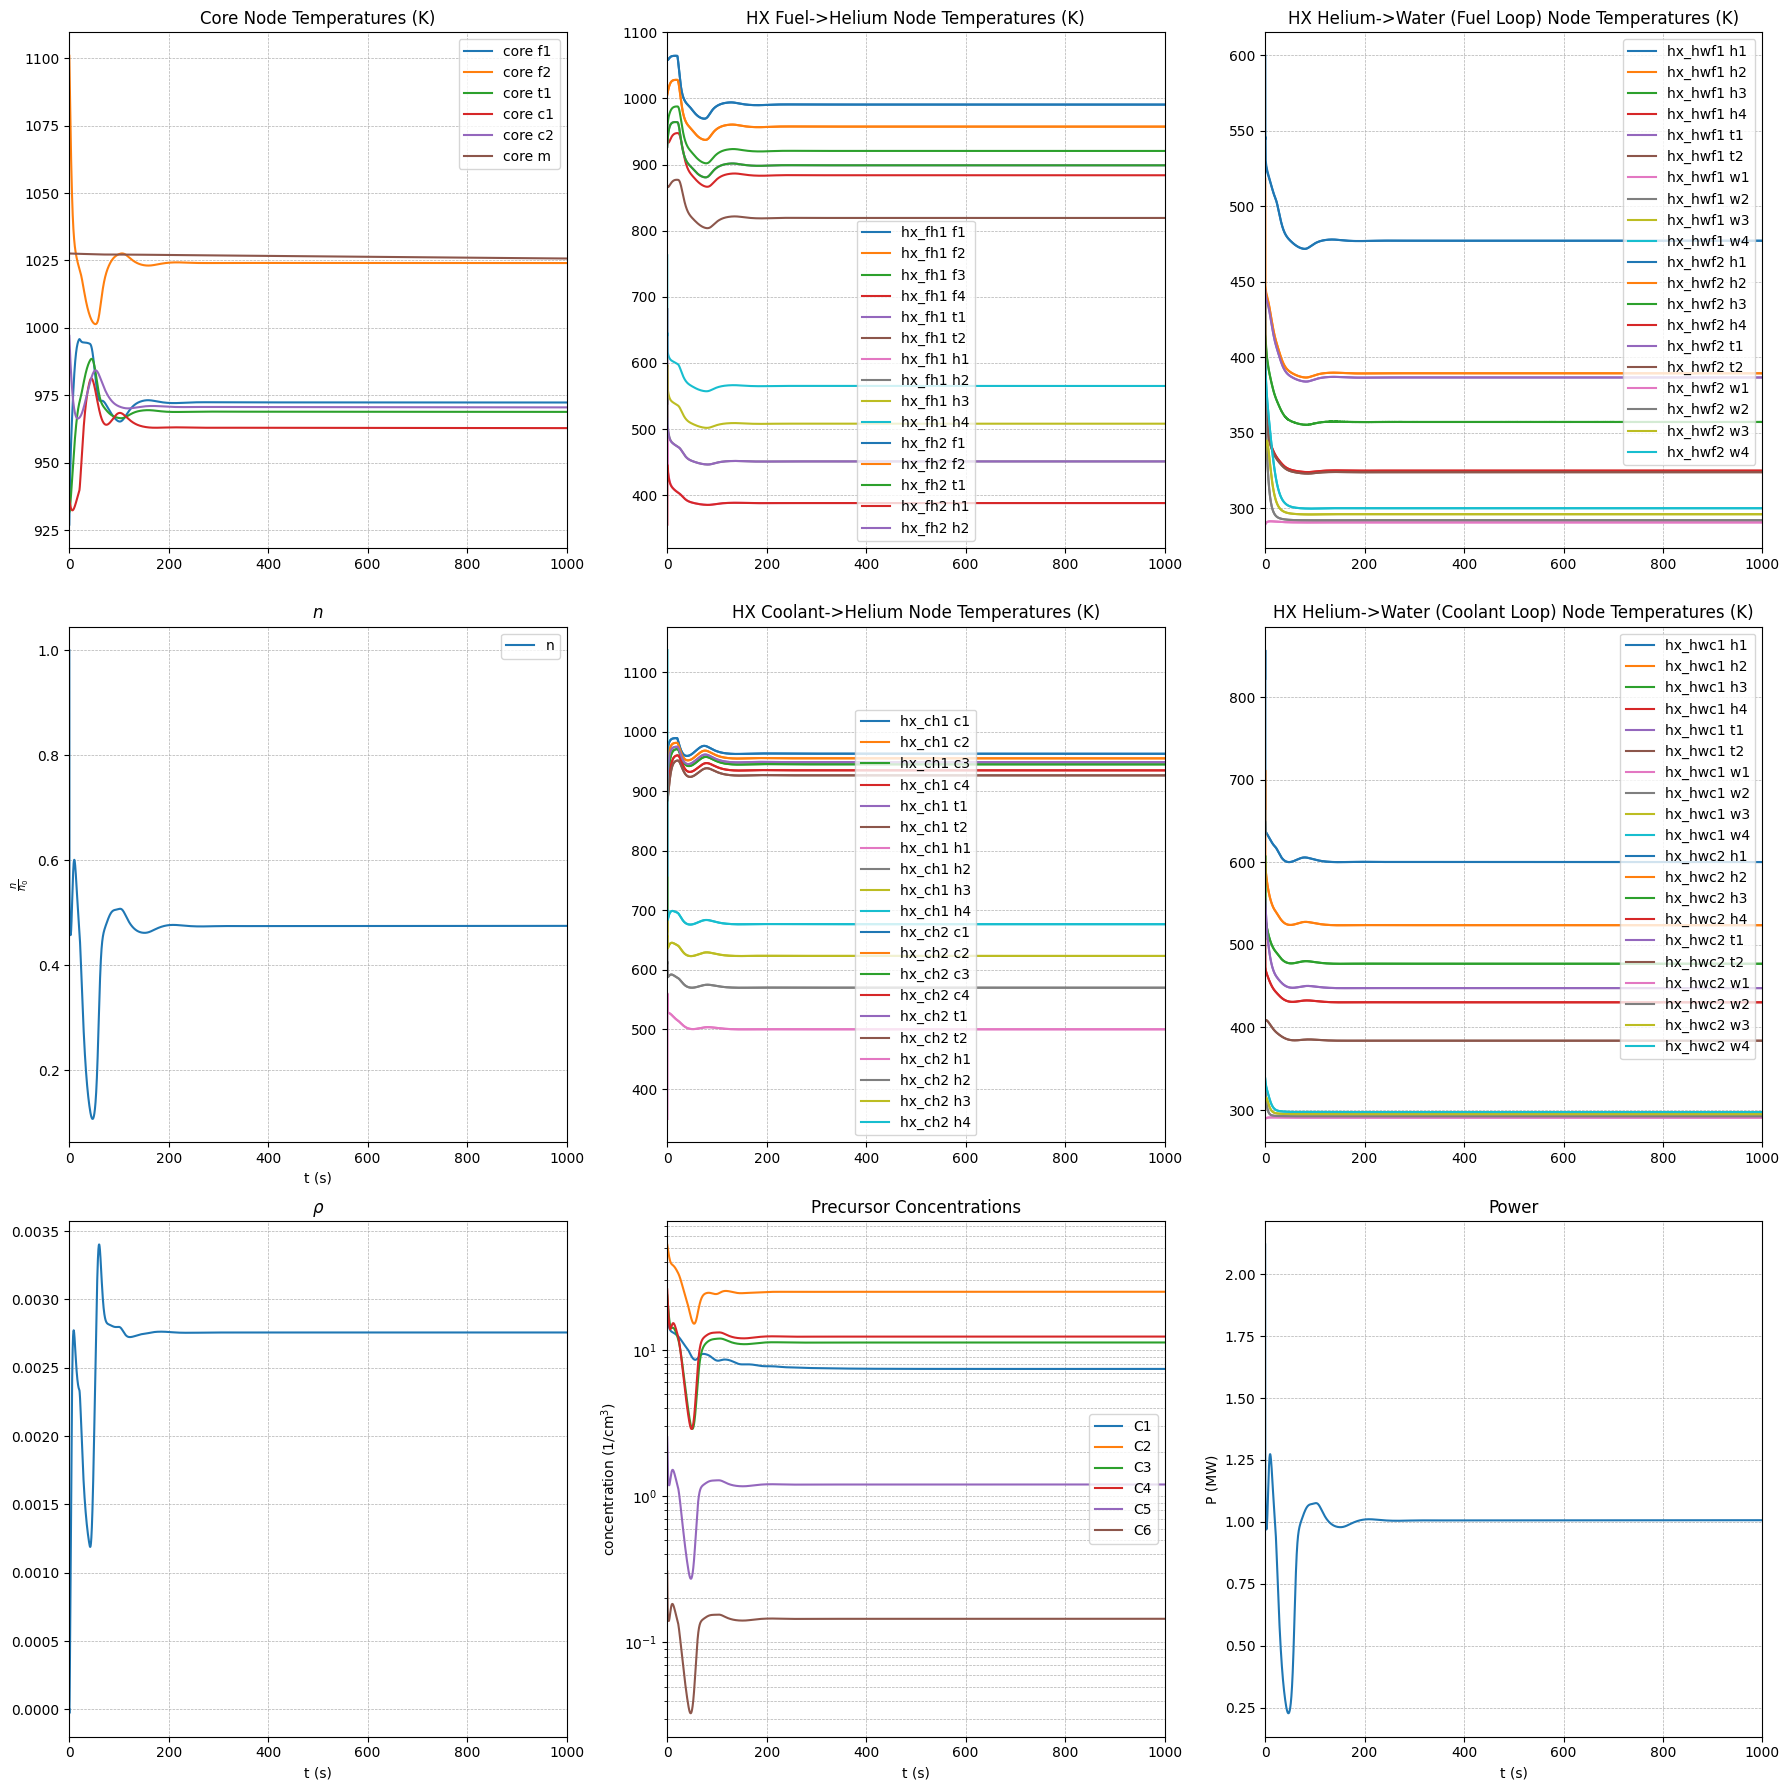

In [5]:
fig,axs = plt.subplots(3,3,figsize=(18,18))

t_0 = 0.0
t_f = 1000

# Set a professional color scheme
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
          'tab:pink', 'tab:gray', 'tab:olive']

# Function to update the style of each axis
def update_axis_style(ax, title = '', x_label='', y_label='', x_ticks=True, y_scale='linear'):
    ax.set_xlim([t_0, t_f])
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', bottom=x_ticks, top=False, labelbottom=x_ticks)
    ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)
    ax.set_yscale(y_scale)

# Core Node Temperatures
update_axis_style(axs[0, 0], "Core Node Temperatures (K)")
axs[0,0].set_xlim([t_0,t_f])
axs[0,0].plot(T,c_f1.y_out,label="core f1") 
axs[0,0].plot(T,c_f2.y_out,label="core f2") 
axs[0,0].plot(T,c_t1.y_out,label="core t1")  
axs[0,0].plot(T,c_c1.y_out,label="core c1")
axs[0,0].plot(T,c_c2.y_out,label="core c2")
axs[0,0].plot(T,c_m1.y_out,label="core m")
axs[0,0].legend()

update_axis_style(axs[0, 1], "HX Fuel->Helium Node Temperatures (K)")
axs[0,1].set_xlim([t_0,t_f])
axs[0,1].plot(T,hx_fh1_f1.y_out,label="hx_fh1 f1") 
axs[0,1].plot(T,hx_fh1_f2.y_out,label="hx_fh1 f2") 
axs[0,1].plot(T,hx_fh1_f3.y_out,label="hx_fh1 f3") 
axs[0,1].plot(T,hx_fh1_f4.y_out,label="hx_fh1 f4") 
axs[0,1].plot(T,hx_fh1_t1.y_out,label="hx_fh1 t1") 
axs[0,1].plot(T,hx_fh1_t2.y_out,label="hx_fh1 t2")  
axs[0,1].plot(T,hx_fh1_h1.y_out,label="hx_fh1 h1")
axs[0,1].plot(T,hx_fh1_h2.y_out,label="hx_fh1 h2")
axs[0,1].plot(T,hx_fh1_h3.y_out,label="hx_fh1 h3")
axs[0,1].plot(T,hx_fh1_h4.y_out,label="hx_fh1 h4")
axs[0,1].plot(T,hx_fh2_f1.y_out,label="hx_fh2 f1") 
axs[0,1].plot(T,hx_fh2_f2.y_out,label="hx_fh2 f2") 
axs[0,1].plot(T,hx_fh2_t1.y_out,label="hx_fh2 t1")  
axs[0,1].plot(T,hx_fh2_h1.y_out,label="hx_fh2 h1")
axs[0,1].plot(T,hx_fh2_h2.y_out,label="hx_fh2 h2")
axs[0,1].legend()

update_axis_style(axs[0, 2])
axs[0,2].set_xlim([t_0,t_f])
axs[0,2].plot(T,hx_hwf1_h1.y_out,label="hx_hwf1 h1") 
axs[0,2].plot(T,hx_hwf1_h2.y_out,label="hx_hwf1 h2") 
axs[0,2].plot(T,hx_hwf1_h3.y_out,label="hx_hwf1 h3") 
axs[0,2].plot(T,hx_hwf1_h4.y_out,label="hx_hwf1 h4") 
axs[0,2].plot(T,hx_hwf1_t1.y_out,label="hx_hwf1 t1")
axs[0,2].plot(T,hx_hwf1_t2.y_out,label="hx_hwf1 t2") 
axs[0,2].plot(T,hx_hwf1_w1.y_out,label="hx_hwf1 w1") 
axs[0,2].plot(T,hx_hwf1_w2.y_out,label="hx_hwf1 w2")
axs[0,2].plot(T,hx_hwf1_w3.y_out,label="hx_hwf1 w3") 
axs[0,2].plot(T,hx_hwf1_w4.y_out,label="hx_hwf1 w4")  
axs[0,2].plot(T,hx_hwf2_h1.y_out,label="hx_hwf2 h1") 
axs[0,2].plot(T,hx_hwf2_h2.y_out,label="hx_hwf2 h2") 
axs[0,2].plot(T,hx_hwf2_h3.y_out,label="hx_hwf2 h3") 
axs[0,2].plot(T,hx_hwf2_h4.y_out,label="hx_hwf2 h4") 
axs[0,2].plot(T,hx_hwf2_t1.y_out,label="hx_hwf2 t1") 
axs[0,2].plot(T,hx_hwf2_t2.y_out,label="hx_hwf2 t2") 
axs[0,2].plot(T,hx_hwf2_w1.y_out,label="hx_hwf2 w1") 
axs[0,2].plot(T,hx_hwf2_w2.y_out,label="hx_hwf2 w2") 
axs[0,2].plot(T,hx_hwf2_w3.y_out,label="hx_hwf2 w3") 
axs[0,2].plot(T,hx_hwf2_w4.y_out,label="hx_hwf2 w4") 
axs[0,2].legend()
axs[0,2].set_title("HX Helium->Water (Fuel Loop) Node Temperatures (K)")

update_axis_style(axs[1, 1])
axs[1,1].set_xlim([t_0,t_f])
axs[1,1].plot(T,hx_ch1_c1.y_out,label="hx_ch1 c1")
axs[1,1].plot(T,hx_ch1_c2.y_out,label="hx_ch1 c2") 
axs[1,1].plot(T,hx_ch1_c3.y_out,label="hx_ch1 c3") 
axs[1,1].plot(T,hx_ch1_c4.y_out,label="hx_ch1 c4") 
axs[1,1].plot(T,hx_ch1_t1.y_out,label="hx_ch1 t1") 
axs[1,1].plot(T,hx_ch1_t2.y_out,label="hx_ch1 t2") 
axs[1,1].plot(T,hx_ch1_h1.y_out,label="hx_ch1 h1") 
axs[1,1].plot(T,hx_ch1_h2.y_out,label="hx_ch1 h2") 
axs[1,1].plot(T,hx_ch1_h3.y_out,label="hx_ch1 h3") 
axs[1,1].plot(T,hx_ch1_h4.y_out,label="hx_ch1 h4") 
axs[1,1].plot(T,hx_ch2_c1.y_out,label="hx_ch2 c1")
axs[1,1].plot(T,hx_ch2_c2.y_out,label="hx_ch2 c2") 
axs[1,1].plot(T,hx_ch2_c3.y_out,label="hx_ch2 c3") 
axs[1,1].plot(T,hx_ch2_c4.y_out,label="hx_ch2 c4") 
axs[1,1].plot(T,hx_ch2_t1.y_out,label="hx_ch2 t1") 
axs[1,1].plot(T,hx_ch2_t2.y_out,label="hx_ch2 t2") 
axs[1,1].plot(T,hx_ch2_h1.y_out,label="hx_ch2 h1") 
axs[1,1].plot(T,hx_ch2_h2.y_out,label="hx_ch2 h2")
axs[1,1].plot(T,hx_ch2_h3.y_out,label="hx_ch2 h3") 
axs[1,1].plot(T,hx_ch2_h4.y_out,label="hx_ch2 h4")  
axs[1,1].legend()
axs[1,1].legend()
axs[1,1].set_title("HX Coolant->Helium Node Temperatures (K)")

update_axis_style(axs[1, 2])
axs[1,2].set_xlim([t_0,t_f])
axs[1,2].plot(T,hx_hwc1_h1.y_out,label="hx_hwc1 h1")
axs[1,2].plot(T,hx_hwc1_h2.y_out,label="hx_hwc1 h2")
axs[1,2].plot(T,hx_hwc1_h3.y_out,label="hx_hwc1 h3")
axs[1,2].plot(T,hx_hwc1_h4.y_out,label="hx_hwc1 h4")
axs[1,2].plot(T,hx_hwc1_t1.y_out,label="hx_hwc1 t1")
axs[1,2].plot(T,hx_hwc1_t2.y_out,label="hx_hwc1 t2")
axs[1,2].plot(T,hx_hwc1_w1.y_out,label="hx_hwc1 w1")
axs[1,2].plot(T,hx_hwc1_w2.y_out,label="hx_hwc1 w2") 
axs[1,2].plot(T,hx_hwc1_w3.y_out,label="hx_hwc1 w3") 
axs[1,2].plot(T,hx_hwc1_w4.y_out,label="hx_hwc1 w4") 
axs[1,2].plot(T,hx_hwc2_h1.y_out,label="hx_hwc2 h1")
axs[1,2].plot(T,hx_hwc2_h2.y_out,label="hx_hwc2 h2")
axs[1,2].plot(T,hx_hwc2_h3.y_out,label="hx_hwc2 h3")
axs[1,2].plot(T,hx_hwc2_h4.y_out,label="hx_hwc2 h4")
axs[1,2].plot(T,hx_hwc2_t1.y_out,label="hx_hwc2 t1")
axs[1,2].plot(T,hx_hwc2_t2.y_out,label="hx_hwc2 t2")
axs[1,2].plot(T,hx_hwc2_w1.y_out,label="hx_hwc2 w1")
axs[1,2].plot(T,hx_hwc2_w2.y_out,label="hx_hwc2 w2") 
axs[1,2].plot(T,hx_hwc2_w3.y_out,label="hx_hwc2 w3") 
axs[1,2].plot(T,hx_hwc2_w4.y_out,label="hx_hwc2 w4") 
axs[1,2].legend()
axs[1,2].set_title("HX Helium->Water (Coolant Loop) Node Temperatures (K)")

update_axis_style(axs[1, 0])
axs[1,0].plot(T,n.y_out,label="n") 
axs[1,0].set_xlabel("t (s)")
axs[1,0].set_title(r"$n$")
axs[1,0].set_ylabel(r"$\frac{n}{n_0}$")
axs[1,0].set_xlim([t_0,t_f])
axs[1,0].legend()

update_axis_style(axs[2, 0])
axs[2,0].plot(T,rho.y_out,label="rho") 
axs[2,0].set_xlabel("t (s)")
axs[2,0].set_title(r"$\rho$")
axs[2,0].set_xlim([t_0,t_f])

update_axis_style(axs[2, 1])
axs[2,1].plot(T,C1.y_out,label="C1") 
axs[2,1].plot(T,C2.y_out,label="C2") 
axs[2,1].plot(T,C3.y_out,label="C3") 
axs[2,1].plot(T,C4.y_out,label="C4") 
axs[2,1].plot(T,C5.y_out,label="C5") 
axs[2,1].plot(T,C6.y_out,label="C6") 
axs[2,1].legend()
axs[2,1].set_xlabel("t (s)")
axs[2,1].set_yscale("log")
axs[2,1].set_ylabel(r"concentration (1/cm$^3$)")
axs[2,1].legend(loc="right")
axs[2,1].set_title("Precursor Concentrations")
axs[2,1].set_xlim([t_0,t_f])

update_axis_style(axs[2, 2])
axs[2,2].plot(T,[k*P for k in n.y_out],label="Power") 
axs[2,2].set_xlabel("t (s)")
axs[2,2].set_title("Power")
axs[2,2].set_ylabel("P (MW)")
axs[2,2].set_xlim([t_0,t_f])

plt.tight_layout()
plt.show()

In [6]:
dp_f1 = (hx_hwf1_w2.y_out[-1]-T0_hhwf_w1)*W_hhwf_w*scp_w
dp_f2 = (hx_hwf2_w2.y_out[-1]-T0_hhwf_w1)*W_hhwf_w*scp_w

dp_c1 = (hx_hwc1_w2.y_out[-1]-T0_hhwc_w1)*W_hhwc_w*scp_w
dp_c2 = (hx_hwc2_w2.y_out[-1]-T0_hhwc_w1)*W_hhwc_w*scp_w

tot = dp_f1 + dp_f2 + dp_c1 + dp_c2
print(f"fuel fraction: {dp_f1+dp_f2}")
print(f"coolant fraction: {dp_c1+dp_c2}")

fuel fraction: 0.31623072977777955
coolant fraction: 0.1278761115132165


In [7]:
dp_cf = (c_f2.y_out[-1]-(hx_fh1_f4.y_out[-1]+hx_fh2_f2.y_out[-1])/2)*W_f*scp_f
dp_cc = (c_c2.y_out[-1]-(hx_ch1_c2.y_out[-1]+hx_ch2_c2.y_out[-1])/2)*W_c*scp_c

tot = dp_cf+dp_cc
print(tot)
print(P*n.y_out[-1])
print(f"fuel fraction: {dp_cf}")
print(f"coolant fraction: {dp_cc}")

1.0144769868060153
1.0067276996221668
fuel fraction: 0.8684792721342666
coolant fraction: 0.14599771467174869


In [8]:
P*n.y_out[-1]

1.0067276996221668